# When Will The Bubble Pop?: Predicting The Next Recession
Kamran, Leon, Atishya, Zoe

# Research Questions
+ What were the economic predictors of the 2008 financial crisis?
+ Does our current economy exhibit similar trends?

# Data 
+ 18 total data points
+ Quandl API 
    + Federal Reserve Economic Data (FRED)
    + Yale Department of Economics
+ "Income and Poverty in the United States: 2017" (CSV), US Census
+ National Student Loan Data System (CSV)
+ Consumer Credit Panel, New York Federal Reserve (CSV)

# Analysis

In [1]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl 
import requests
import json
import os
import csv
from pprint import pprint
from scipy import stats
from config import api_key, api_key1

#Python API for FRED (Federal Reserve Economic Data) and ALFRED (Archival FRED)
from fredapi import Fred

#Quandl
url_cpi = "https://www.quandl.com/api/v3/datasets/YALE/RBCI.json?"
query_cpi = f'{url_cpi}api_key={api_key1}'
CPI = requests.get(query_cpi).json()

url_fed = "https://www.quandl.com/api/v3/datasets/FRED/EFFR.json?"
query_fed = f'{url_fed}api_key={api_key1}'
fed = requests.get(query_fed).json()

url_inflation = "https://www.quandl.com/api/v3/datasets/YALE/SPCOMP.json?"
query_inflation = f'{url_inflation}api_key={api_key1}'
inflation = requests.get(query_inflation).json()

url_yield = "https://www.quandl.com/api/v3/datasets/USTREASURY/REALYIELD.json?"
query_yield = f'{url_yield}api_key={api_key1}'
yield_real = requests.get(query_yield).json()

url_unemployment = "https://www.quandl.com/api/v3/datasets/FRED/NROUST.json?"
query_unemployment = f'{url_unemployment}api_key={api_key1}'
unemployment = requests.get(query_unemployment).json()


# History of Fed Fund Rates Over Last Two Decades

In [2]:
fed_data = pd.DataFrame(fed["dataset"]["data"])
fed_data = fed_data.rename(columns = {0: "Date", 1:"Value"})
fed_data["Date"] = pd.to_datetime(fed_data["Date"])
fed_data.describe()

,Value
count,4586.000000
mean,1.643735
std,1.869222
min,0.040000
25%,0.150000
50%,1.000000
75%,2.270000
max,7.030000


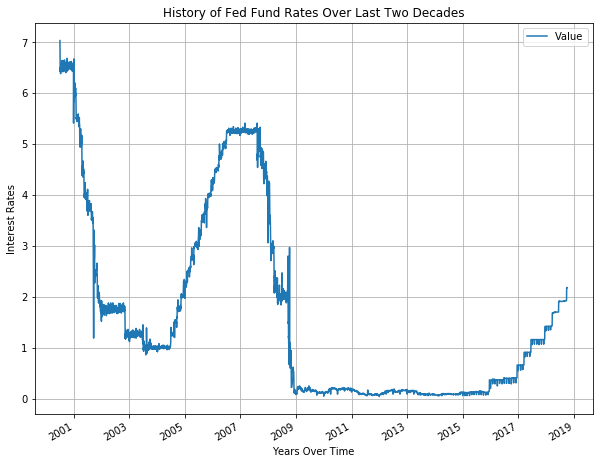

In [3]:
fed_data.plot(kind="line", x="Date", y="Value", figsize=(10,8))
plt.title("History of Fed Fund Rates Over Last Two Decades")
plt.xlabel("Years Over Time")
plt.ylabel("Interest Rates")
plt.xticks(rotation=30)
#plt.savefig("Cost Index Value")
plt.grid()
plt.show()

+ Interest Rate spiked in 2007
+ The rate collapsed in 2008 - 2009 (That is where the recession happended)
+ To correlate the interest rate, people shifted to corporate bonds instead of treasury bonds
+ Slowly recovering in the year 2017

# Increasing of Consumer Price Index Over the Years

In [4]:
CPI_data = pd.DataFrame(CPI["dataset"]["data"])
CPI_data = CPI_data.rename(columns = {0: "Date", 1:"Cost Index", 2: "U.S. Population (Millions)", 3:"Long Rate"})
CPI_clean = CPI_data.fillna(0)
CPI_clean = CPI_clean.loc[(CPI_clean["Date"] < "2016-12-31") & (CPI_clean["Date"] >= "2000-12-31"), :]
CPI_clean = CPI_clean.sort_values("Date", ascending=True)
CPI_clean["Date"] = pd.to_datetime(CPI_clean["Date"])
CPI_clean.describe()

,Cost Index,U.S. Population (Millions),Long Rate
count,16.000000,16.000000,16.000000
mean,82.741071,302.622187,3.778750
std,3.843629,12.562264,1.329987
min,76.315435,282.398000,1.880000
25%,80.260270,292.603000,2.775000
50%,83.321383,303.119500,3.895000
75%,85.797265,312.749250,4.505000
max,88.525400,321.704000,6.660000


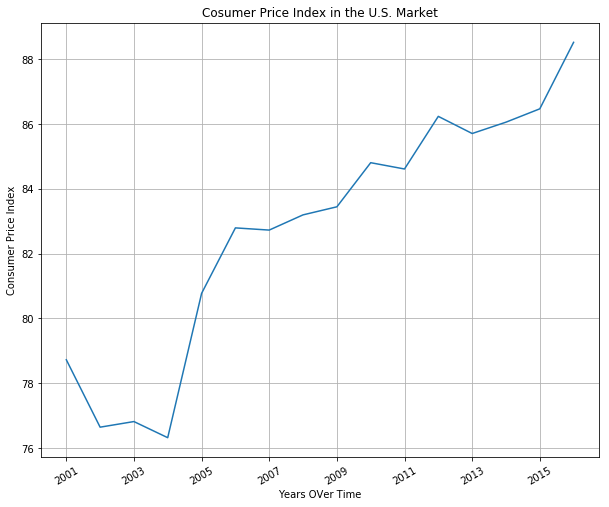

In [5]:
plt.figure(figsize=(10,8))
plt.plot(CPI_clean["Date"], CPI_clean["Cost Index"])
plt.title("Cosumer Price Index in the U.S. Market")
plt.xlabel("Years OVer Time")
plt.xticks(rotation=30)
plt.ylabel("Consumer Price Index")
#plt.savefig("CPI")
plt.grid()
plt.show()

+ Increase in CPI which is bad for consumers
+ CPI increase too much would not be good since the value of product will drop (demand will be low and increased in supply)
+ CPI decreased will not be good as well (supply will be low since everything will be cheap)

# Yearly Tracking of Treasury Bonds

In [6]:
yield_curve = pd.DataFrame(yield_real["dataset"]["data"])
yield_curve = yield_curve.rename(columns = {0: "Date", 1:"5 Year", 2:"7 Year",
                                                 3: "10 Year", 4: "20 Year", 5:"30 Year"})
yield_curve["Date"] = pd.to_datetime(yield_curve["Date"])
yield_clean = yield_curve.fillna(0)
yield_clean.loc[yield_clean["Date"] >= "2010-02-22"]
yield_clean.describe()

,5 Year,7 Year,10 Year,20 Year,30 Year
count,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000
mean,0.581272,0.861553,1.093796,1.241153,0.589237
std,1.040536,0.969163,0.902133,0.838007,0.624794
min,-1.670000,-1.330000,-0.870000,-0.170000,0.000000
25%,-0.130000,0.250000,0.430000,0.620000,0.000000
50%,0.450000,0.750000,1.005000,1.040000,0.545000
75%,1.270000,1.570000,1.860000,2.040000,1.000000
max,4.240000,4.270000,3.150000,3.350000,2.260000


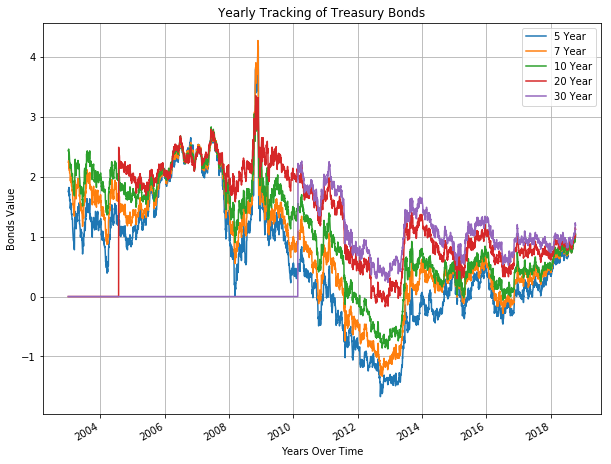

In [7]:
yield_graph = yield_clean.plot(kind="line", x="Date", y="5 Year", figsize=(10,8))
yield_clean.plot(kind="line", x="Date", y="7 Year", ax=yield_graph)
yield_clean.plot(kind="line", x="Date", y="10 Year", ax=yield_graph)
yield_clean.plot(kind="line", x="Date", y="20 Year", ax=yield_graph)
yield_clean.plot(kind="line", x="Date", y="30 Year", ax=yield_graph)
plt.title("Yearly Tracking of Treasury Bonds")
plt.xticks(rotation = 30)
plt.xlabel("Years Over Time")
plt.ylabel("Bonds Value")
plt.grid()
plt.show()

+ Treasury bonds spiked, and crashed until 2014 since it has not much value

# Unemployment Rate

In [8]:
unemployment_data = pd.DataFrame(unemployment["dataset"]["data"])
unemployment_data = unemployment_data.rename(columns = {0: "Date", 1:"Value"})
unemployment_clean = unemployment_data.loc[unemployment_data["Date"] >= "2006-01-31"]
unemployment_clean = unemployment_clean.sort_values("Date", ascending = True)
unemployment_clean["Date"] = pd.to_datetime(unemployment_clean["Date"])
unemployment_clean.describe()

,Value
count,91.000000
mean,4.860989
std,0.401614
min,4.550000
25%,4.590000
50%,4.620000
75%,4.980000
max,5.800000


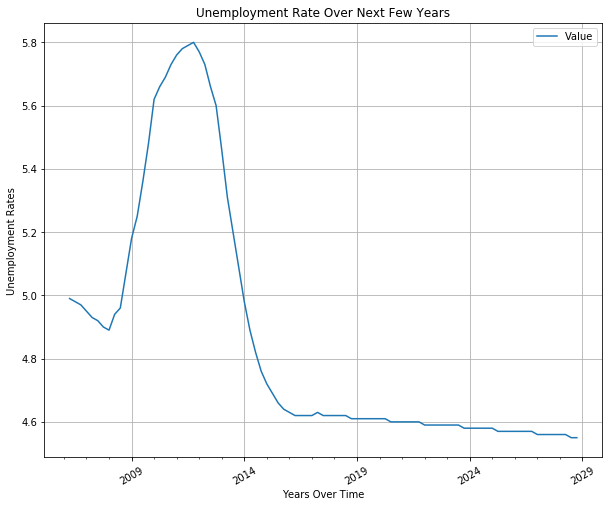

In [9]:
unemployment_clean.plot(kind="line", x="Date", y="Value", figsize=(10,8))
plt.title("Unemployment Rate Over Next Few Years")
plt.xlabel("Years Over Time")
plt.ylabel("Unemployment Rates")
plt.xticks(rotation = 30)
plt.grid()

+ Unemployment rate has been steady over the past few years after the recession (Fed wants to keep it that way)
+ High unemployment rate obviously is not good after the crash of U.S. economy

# Household Median Income 

In [10]:
#Load CSV
file_to_load = "resource/TotalHousing.csv"
housing_data = pd.read_csv(file_to_load)

#Remove extraneous rows
update_housing_df=housing_data.drop(housing_data.index[19:52])

#Remove repeated rows
new_housing=update_housing_df.drop(update_housing_df.index[4])

#Check data types
new_housing.dtypes

new_housing.describe()

,Year,Estimate
count,18.000000,18.000000
mean,2008.500000,57684.000000
std,5.338539,2014.550891
min,2000.000000,54569.000000
25%,2004.250000,55962.250000
50%,2008.500000,57911.000000
75%,2012.750000,58711.750000
max,2017.000000,61372.000000


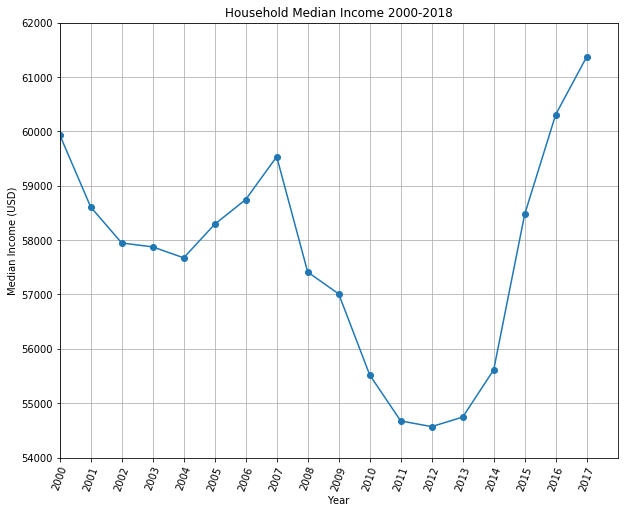

In [11]:
#Plot figure
plt.figure(figsize=(10,8))
x_axis=new_housing["Year"]
y_axis=new_housing["Estimate"]
plt.plot(x_axis,y_axis,marker="o")
plt.xlim(2000,2018)
plt.ylim(54000,62000)
plt.title("Household Median Income 2000-2018")
plt.xlabel("Year")
plt.ylabel("Median Income (USD)")
plt.xticks(rotation=70)
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.grid()
plt.show()

+ The US economy was doing well up until 2007 when the recession hit
    + Correlates with unemployment rate
    + Also indicative of disproportionate distribution of income
+ Since 2012, the median income has increased which can be interpreted as a healthy economy

# S&P/Case-Shiller US National Home Price Index

In [12]:
#Pull data from API
fred = Fred(api_key)
data = fred.get_series('CSUSHPINSA', '1/1/2000', '1/10/2018')
data_df = pd.DataFrame(data)
data_df = data_df.reset_index()
data_df.columns = ['Year','Case Index']
data_df.describe()

,Case Index
count,217.000000
mean,153.604687
std,24.713578
min,100.000000
25%,138.484000
50%,153.813000
75%,175.124000
max,196.413000


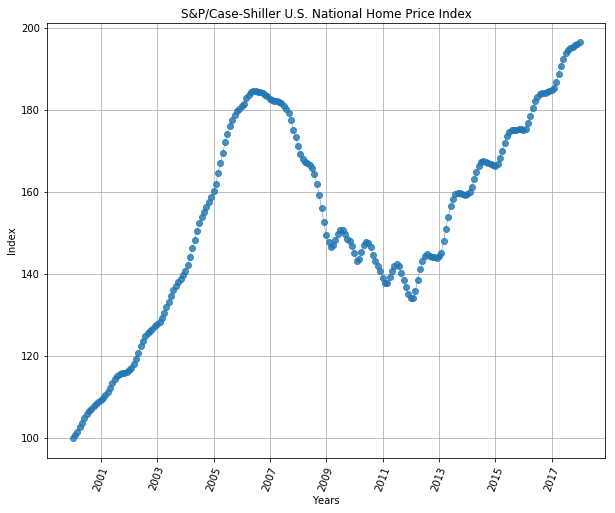

In [13]:
#Plot
plt.figure(figsize=(10,8))
x_axis=data_df["Year"]
y_axis=data_df["Case Index"]
plt.plot(x_axis,y_axis, marker="o", linewidth=0.5,alpha=0.8)
plt.title("S&P/Case-Shiller U.S. National Home Price Index")
plt.xlabel("Years")
plt.ylabel("Index")
plt.xticks(rotation=70)
plt.grid()
plt.show()

+ Accurate snapshot of the housing market that tracks the sale of homes 
    + Index measures changes in the prices of single-family homes
+ Since 2012, the trendline shows that prices are increasing exponentially, similar to median income
+ Housing market is secured, but the same cannot be said for student borrowers

# Student Loan Borrowing

In [14]:
#reading csv for outstanding student loans data
file_1 = "resource/loanportfolio.csv"
outstanding_loans = pd.read_csv(file_1)
outstanding_loans.head()

,Year,Direct Dollars Outstanding,Direct recipients,FFEL Dollars Outstanding,FFEL recipients,Perkins Outstanding,Perkins Recipients,Total Dollars Outstanding,Total unduplicated recipients
0,2007.0,106.8,7.0,401.9,22.6,8.2,2.8,516.0,28.3
1,2008.0,122.5,7.7,446.5,23.7,8.5,2.9,577.0,29.9
2,2009.0,154.9,9.2,493.3,25.0,8.7,3.0,657.0,32.1
3,2010.0,224.5,14.4,516.7,25.1,8.4,2.9,749.8,34.3
4,2011.0,350.1,19.4,489.8,23.8,8.3,2.9,848.2,36.5


In [15]:
#reading csv for student loan growth rate
file_2 = "resource/LoansData.csv"
loans_rate = pd.read_csv(file_2)
loans_rate.head()

,Year,2016 Loans Billions,2018 Loans Billions
0,1996/97,46.5,48.85290
1,1997/98,48.5,50.95410
2,1998/99,50.3,52.84518
3,1999/00,53.8,56.52228
4,2000/01,54.9,57.67794


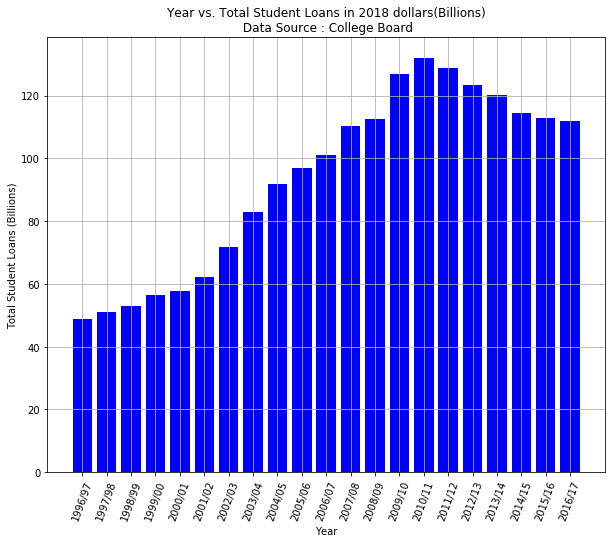

In [16]:
#Plotting Year versus total student loans borrowed 
plt.figure(figsize = (10,8))
plt.bar(loans_rate["Year"], loans_rate["2018 Loans Billions"], color = "b", align = "center")
plt.title("Year vs. Total Student Loans in 2018 dollars(Billions)\n Data Source : College Board")
plt.xlabel("Year")
plt.xticks(rotation=70)
plt.ylabel("Total Student Loans (Billions)")
plt.grid()
#plt.savefig("plots/YearvsTotalStudentLoans.png", bbox_inches="tight")


+ In the academic year 1996/97, a total of 46.5 billion U.S. dollars was offered to students across the United States in the form of loans. By 2016/17, this amount had increased to 106.7 billion U.S. dollars.
+ Students had to take on heavier debts because public colleges and universities have increased tuition and the drop in house values made it harder for families to tap into their home equity to pay for tuition. 
+ The total amount of student loans being borrowed was increasing drastically till 2016 but has started to decline since then. 
+ This can be explained by the increasing median household income and decreasing unemployment rates since 2012. 


Text(2019,42,'Data Source: NSLDS \n 2018 4th quarter data unavailable')

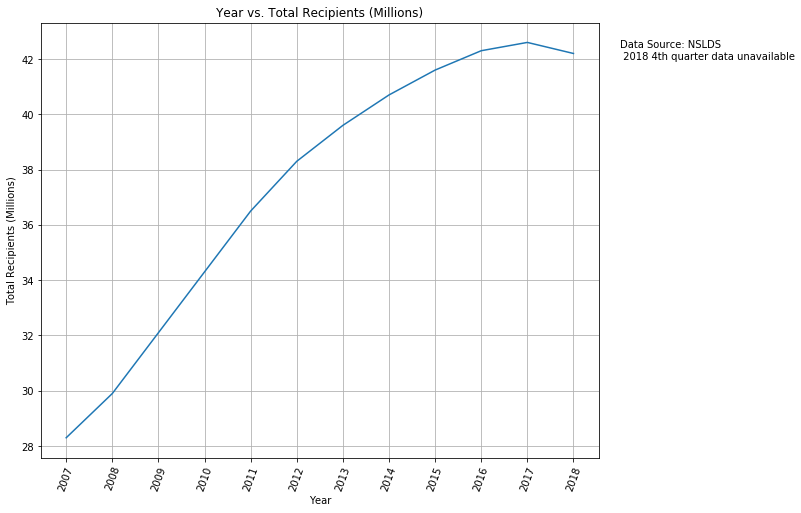

In [34]:
#plotting total recipients
plt.figure(figsize = (10,8))
x_axis = outstanding_loans["Year"]
y_axis = outstanding_loans["Total unduplicated recipients"]
plt.plot(x_axis,y_axis)
plt.title("Year vs. Total Recipients (Millions)")
plt.xlabel("Year")
plt.xticks(rotation=70)
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.ylabel("Total Recipients (Millions)")
plt.grid()
plt.text(2019,42, "Data Source: NSLDS \n 2018 4th quarter data unavailable")
#plt.savefig("plots/YearvsTotalRecipients.png", bbox_inches="tight")

+ Total number of number of recipients for total student loans borrowed is increasing. This could have an effect on the student loan default rates. 

R squared value:0.9962457863238091
Slope:86.22832167832169
Intercept:-172555.35571095574


2488.137296037283

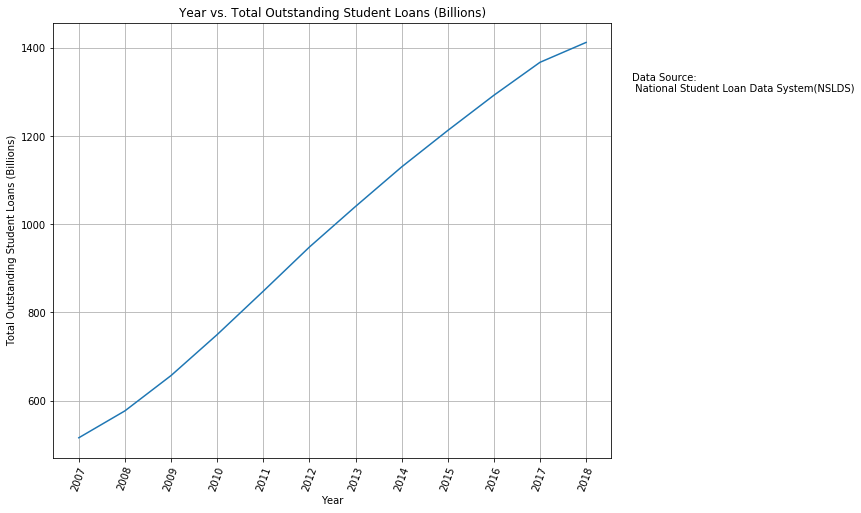

In [18]:
#plotting total outstanding student loans versus year
plt.figure(figsize = (10,8))
x_axis = outstanding_loans["Year"]
y_axis = outstanding_loans["Total Dollars Outstanding"]
plt.plot(x_axis,y_axis)
plt.title("Year vs. Total Outstanding Student Loans (Billions)")
plt.xlabel("Year")
plt.xticks(rotation=70)
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.ylabel("Total Outstanding Student Loans (Billions)")
plt.grid()
plt.text(2019,1300, "Data Source: \n National Student Loan Data System(NSLDS)")
#plt.savefig("plots/YearvsTotalStudentLoansOutstanding.png", bbox_inches="tight")
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
print(f"R squared value:{r_value**2}")
print(f"Slope:{slope}")
print(f"Intercept:{intercept}")
Total_outstanding_loans_2030 = (slope*2030) + intercept
Total_outstanding_loans_2030 

+ The total student loans outstanding continues to increase over the years. The amount of American student debt has more than doubled since the last financial crisis.
+ Performing a linear regression resulted in an R square value of 0.996 which implies that the total outstanding loans is increasing linearly over time. 
+ Using the slope and intercept from the linear trend line, we can predict that the total outstanding loans in 2030 will amount to 2488 billion dollars.


In [19]:
file_3 = "resource/Studentloans_delinquency.csv"
loansdelinquency_rate = pd.read_csv(file_3)
loansdelinquency_rate.head()

,Year,Student Loan Delinquency,Percent Total Debt
0,2003,3.79,6.23
1,2004,5.64,6.32
2,2005,6.14,6.59
3,2006,9.93,7.14
4,2007,11.11,7.51


count    16.000000
mean     18.794375
std       9.833330
min       3.790000
25%      10.815000
50%      18.295000
75%      28.672500
max      30.990000
Name: Student Loan Delinquency, dtype: float64

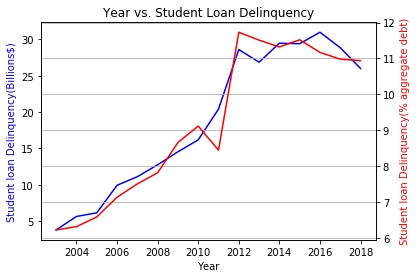

In [20]:
x_axis = loansdelinquency_rate["Year"]
y_axis = loansdelinquency_rate["Student Loan Delinquency"]
y1_axis = loansdelinquency_rate["Percent Total Debt "]



fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x_axis,y_axis, color = "b")
ax2.plot(x_axis, y1_axis, color = "r")
plt.title("Year vs. Student Loan Delinquency")
ax1.set_xlabel("Year")
ax1.set_ylabel("Student loan Delinquency(Billions$)",color = 'b')
ax2.set_ylabel("Student loan Delinquency(% aggregate debt)",color = 'r')
plt.grid()
loansdelinquency_rate["Student Loan Delinquency"].describe()

+ The student loans delinquency rate was increasing steadily till 2016 and has only shown a slight decline since then. 
+ The student loans delinquency as a percent of the total debt has decreased only slightly since 2014. The decline could be attributed to better job opportunities in the last couple years. 
+ Although there is a slight decline in the delinquency rates, the total outstanding student loans is a significant amount and a contributing factor to the next financial crisis.


# Wells Fargo National Housing Market Index

In [21]:
#Python API for FRED (Federal Reserve Economic Data) and ALFRED (Archival FRED)
from fredapi import Fred

In [22]:
#NAHB / Wells Fargo National Housing Market Index
WellsFargo_HM_Index = quandl.get("NAHB/NWFHMI", authtoken="y7AX1dy3giQQhANZj-7n", collapse="annual", start_date="2000-01-01")
WellsFargo_HM_Index.describe()

,Value
count,19.000000
mean,48.263158
std,21.898356
min,9.000000
25%,27.000000
50%,57.000000
75%,65.000000
max,74.000000


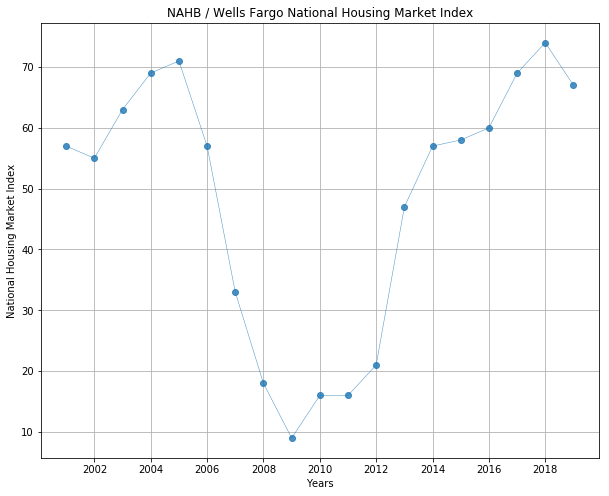

<Figure size 432x288 with 0 Axes>

In [23]:
WellsFargo_HM_Index = WellsFargo_HM_Index.reset_index()
plt.figure(figsize=(10,8))
x_vals = WellsFargo_HM_Index["Month"]
y_vals = WellsFargo_HM_Index["Value"]
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("NAHB / Wells Fargo National Housing Market Index")
plt.xlabel("Years")
plt.ylabel("National Housing Market Index")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/National_Housing_Market_Index.png")

+ The HMI is a weighted, seasonally adjusted statistic derived from ratings for present single-family sales, single-family sales in the next six months and buyers' traffic. 
+ Each RMI component & subcomponent is measured on a scale of 0 to 100, where an index number of 50 indicates equal numbers of builders/remodelers to buyers
+ The data collected is from January 2000 till present 
+ Year 2006 shows the housing market bubble with a HMI of 70 - showing more builders compared to buyers
+ Year 2009 clearly shows the housing market bust with a HMI of less than 10 - very little appetite for builders and remodellers

# Delinquency Rate on Single-Family Residential Mortgages

In [24]:
#Delinquency Rate on Single-Family Residential Mortgages
Delinquencydata = quandl.get("FRED/DRSFRMACBN", authtoken="y7AX1dy3giQQhANZj-7n", start_date="2000-01-01")
Delinquencydata.describe()

,Value
count,74.000000
mean,5.029459
std,3.410559
min,1.400000
25%,2.052500
50%,3.700000
75%,8.127500
max,11.360000


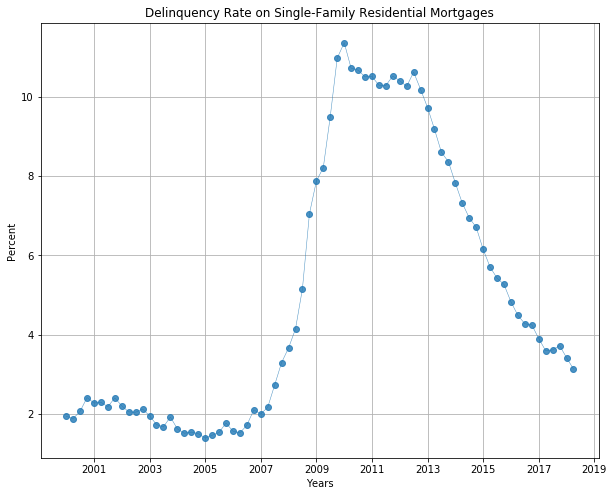

<Figure size 432x288 with 0 Axes>

In [25]:
Delinquencydata = Delinquencydata.reset_index()
plt.figure(figsize=(10,8))
x_vals = Delinquencydata["Date"]
y_vals = Delinquencydata["Value"]
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("Delinquency Rate on Single-Family Residential Mortgages")
plt.xlabel("Years")
plt.ylabel("Percent")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/MortgageDelinquencyRate.png")

+ Delinquency Rate is defined and reported by Lenders when the borrower has missed two or more payments
+ The graph above show that between borrowers started defaulting on their payments starting 2005 when the delinquency rate rose from 2% and to a high above 10% by 2009
+ From 2009 thru 2010, the delinquency rate stabilized 
+ From 2012 to present, the rates have come down to under 4% but higher than before the market crashed

# Bonds Become The Safe Haven For Investors

In [26]:
# US Corporate Bonds Total Return Index
# Corporate bonds are providing higher yields and rates of returns to investors
USCorpBondsTRIndex = quandl.get("ML/TRI", authtoken="y7AX1dy3giQQhANZj-7n", start_date="2000-01-01")
USCorpBondsTRIndex.describe()

,BAMLCC0A0CMTRIV
count,4900.000000
mean,1928.049977
std,580.228089
min,984.250000
25%,1480.855000
50%,1706.350000
75%,2473.250000
max,2910.770000


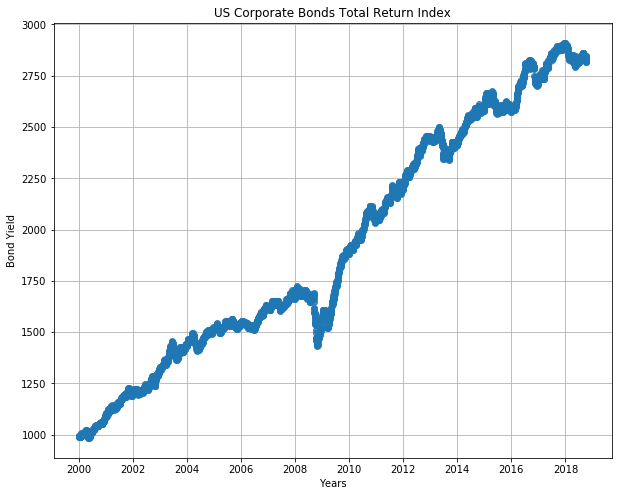

<Figure size 432x288 with 0 Axes>

In [27]:
USCorpBondsTRIndex = USCorpBondsTRIndex.reset_index()
USCorpBondsTRIndex.head()
x_vals = USCorpBondsTRIndex["DATE"]
y_vals = USCorpBondsTRIndex["BAMLCC0A0CMTRIV"]
plt.figure(figsize=(10,8))
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("US Corporate Bonds Total Return Index")
plt.xlabel("Years")
plt.ylabel("Bond Yield")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/Corporate_Bonds_Total_Return_Index.png")

+ The above graph of the US Corporate Bonds Total Return Index showing the investment grade of Corporate Debt and attracts investors to buy corporate bonds with high yields or returns
+ Since 2008, the appetite for investors to buy corporate bonds has doubled

# Illiquidity in the bond market

In [28]:
# Nonfinancial corporate business; debt securities; liability, Level
# Corporate Debt is risings - in a bubble
# We are in a corporate debt bubble
# FRED API_KEY NCBDBIQ027S
from fredapi import Fred
fred = Fred(api_key)
data = fred.get_series('NCBDBIQ027S', '1/1/2000', '1/10/2018')
data_df = pd.DataFrame(data)
data_df = data_df.reset_index()
data_df.columns = ['Year','NCBDBIQ027S']
data_df.describe()

,NCBDBIQ027S
count,7.300000e+01
mean,3.937598e+06
std,1.090051e+06
min,2.583458e+06
25%,3.004471e+06
50%,3.625846e+06
75%,4.777538e+06
max,6.218665e+06


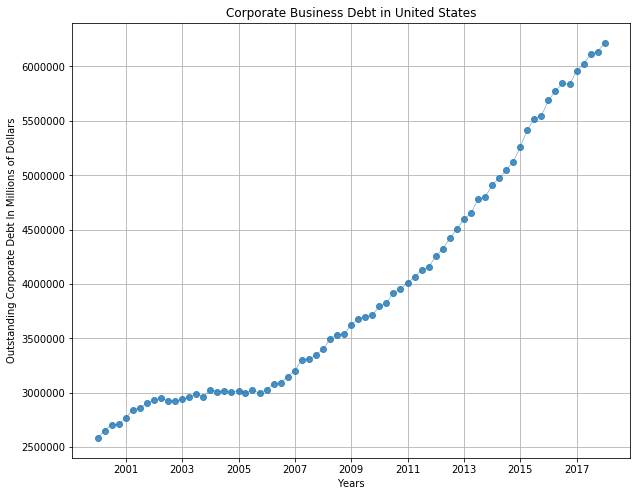

<Figure size 432x288 with 0 Axes>

In [29]:
# Plot Nonfinancial corporate business; debt securities; liability, Level
# FRED API_KEY NCBDBIQ027S
x_vals = data_df["Year"]
y_vals = data_df["NCBDBIQ027S"]
plt.figure(figsize=(10,8))
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("Corporate Business Debt in United States")
plt.xlabel("Years")
plt.ylabel("Outstanding Corporate Debt In Millions of Dollars")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/Corporate_Business_Debt.png")

+ An asset is said to be “liquid” if traders can convert it quickly to cash without materially affecting its market price
+ Most bond markets are highly illiquid as most bonds are traded 
+ As shown by the graph above, we see a steady rise in outstanding corporate debt
+ Unlike the stock market, bonds are typically trade over-the-counter (OTC)—in a decentralized trading environment where the number of buyers may be far less than the number of sellers
+ Since 2007 to present, the supply of U.S. corporate bonds has gone up from 3 trillion dollars to 6 trillion dollars

# Household Debt To GDP

In [30]:
# Household Debt to GDP for United States
from fredapi import Fred
fred = Fred(api_key)
data = fred.get_series('HDTGPDUSQ163N', '1/1/2000', '1/10/2018')
data_df = pd.DataFrame(data)
data_df = data_df.reset_index()
data_df.columns = ['Year','HDTGPDUSQ163N']
data_df.describe()

,HDTGPDUSQ163N
count,48.000000
mean,88.961647
std,6.939734
min,79.872463
25%,81.818527
50%,88.921509
75%,95.841805
max,99.187078


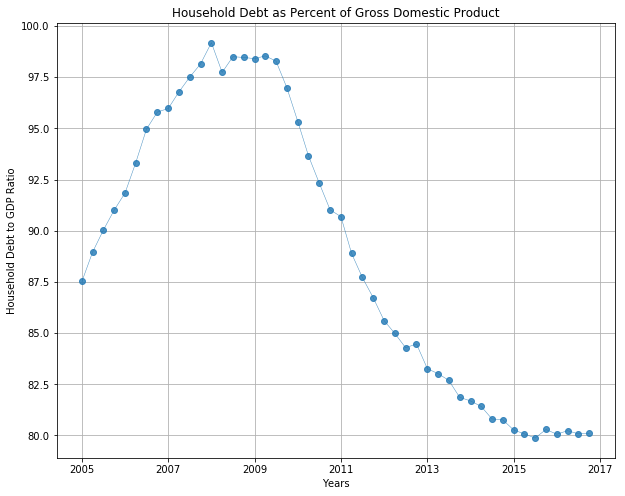

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot Household Debt to GDP for United States (HDTGPDUSQ163N)
x_vals = data_df["Year"]
y_vals = data_df["HDTGPDUSQ163N"]
plt.figure(figsize=(10,8))
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("Household Debt as Percent of Gross Domestic Product")
plt.xlabel("Years")
plt.ylabel("Household Debt to GDP Ratio")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/Household_Debt_to_GDP.png")

+ GDP or gross domestic product is the final value of all the goods and services produced annually by the US
+ Household debt rose from 87.% in 2005 to it's peak of over 100% by between 2007 and 2008
+ Since 2009 to present household debt has gone down to 80% of GDP

# Total Federal Debt As A Share Of GDP

In [32]:
# Federal Debt: Total Public Debt as Percent of Gross Domestic Product
# FRED API_KEY GFDEGDQ188S
from fredapi import Fred
fred = Fred(api_key)
data = fred.get_series('GFDEGDQ188S', '1/1/2000', '1/10/2018')
data_df = pd.DataFrame(data)
data_df = data_df.reset_index()
data_df.columns = ['Year','GFDEGDQ188S']
data_df.describe()

,GFDEGDQ188S
count,73.000000
mean,78.793460
std,19.809562
min,54.037660
25%,60.073850
50%,77.299700
75%,100.427220
max,105.256170


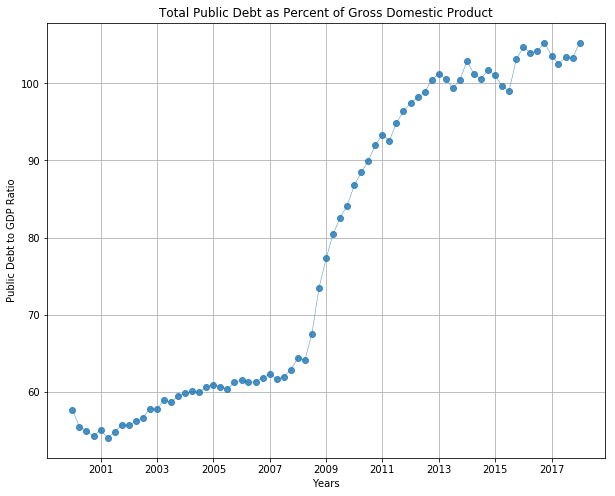

<Figure size 432x288 with 0 Axes>

In [33]:
# plot 
x_vals = data_df["Year"]
y_vals = data_df["GFDEGDQ188S"]
plt.figure(figsize=(10,8))
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("Total Public Debt as Percent of Gross Domestic Product")
plt.xlabel("Years")
plt.ylabel("Public Debt to GDP Ratio")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/Public_Debt_to_GDP.png")

+ Federal debt was around 60 % of GDP for close to 10 years untill the recession
+ Since the recent recession, Federal debt is spiralling out of control to over 100% of GDP
+ Marked increase in debt as a response to the recession is alarming